In [2]:
import pandas as pd
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cmocean
import matplotlib

# Load coordinates

In [3]:
corners_regions_byrd = pd.read_csv("/home/kim/ice_thickness/data/real_data/corners_byrd_regions.csv")
corners_regions_byrd

,name,x_min,x_max,y_min,y_max
0,region_Byrd,350000,650000,-1000000,-700000
1,region_upper_byrd,400000,470000,-800000,-730000
2,region_mid_byrd,395000,465000,-870000,-800000
3,region_lower_byrd,420000,450000,-910000,-880000


## Load Bedmap3

Overview of data sets: https://ramadda.data.bas.ac.uk/repository/entry/show?entryid=2d0e4791-8e20-46a3-80e4-f5f6716025d2 

Load smaller tiff file with ice thickness only:  
wget https://ramadda.data.bas.ac.uk/repository/entry/show?entryid=2d0e4791-8e20-46a3-80e4-f5f6716025d2

Load full Bedmap3 data set (2.32 GB):  
wget https://ramadda.data.bas.ac.uk/repository/entry/get/bedmap3.nc?entryid=synth%3A2d0e4791-8e20-46a3-80e4-f5f6716025d2%3AL2JlZG1hcDMubmM%3D

In [4]:
# wget https://ramadda.data.bas.ac.uk/repository/entry/show?entryid=2d0e4791-8e20-46a3-80e4-f5f6716025d2
# wget https://ramadda.data.bas.ac.uk/repository/entry/get/bedmap3.nc?entryid=synth%3A2d0e4791-8e20-46a3-80e4-f5f6716025d2%3AL2JlZG1hcDMubmM%3D

In [5]:
bm3 = xr.open_dataset("/home/kim//data/bedmap3/bedmap3.nc")

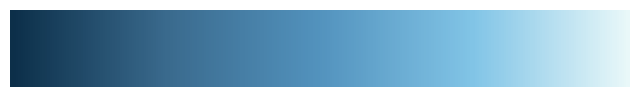

In [6]:
# Use the same colormap as in the Bedmap3 paper: https://www.nature.com/articles/s41597-025-04672-y/figures/7
values = np.array([0., 0.25, 0.5, 0.75, 1.])
# colors = ["#396a90", "#5986a7", "#83a8c0", "#accad9", "#dff4f6"]
# However, we increase vibrancy a bit
colors = ["#0c2f49", "#3a6a8d", "#5393be", "#82c5e7", "#e9f8f9"]
bedmap_cmap = matplotlib.colors.LinearSegmentedColormap.from_list(name = "error_cmap", colors = list(zip(values, colors)))

gradient = np.linspace(0, 1, 256).reshape(1, -1)
gradient = np.vstack([gradient] * 20)  # Make it tall enough to see

# Plot the gradient with the custom colormap
plt.figure(figsize = (8, 1))
plt.imshow(gradient, aspect = 'auto', cmap = bedmap_cmap)
plt.axis('off')

plt.savefig(f"figures/cmaps/bedmap.png", dpi = 100, bbox_inches = 'tight', pad_inches = 0)

plt.show()

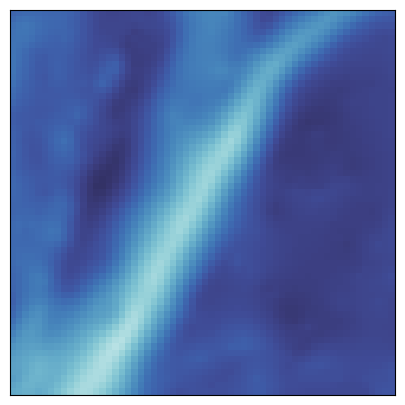

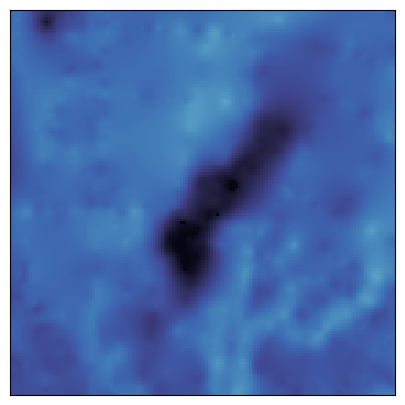

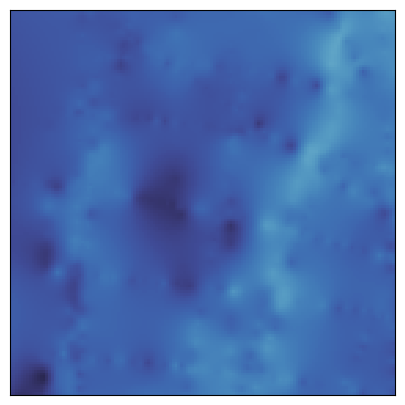

In [10]:
for region in ["region_lower_byrd", "region_mid_byrd", "region_upper_byrd"]:

    region_specs = corners_regions_byrd[corners_regions_byrd["name"] == region].iloc[0]

    bedmap3_region_subset = bm3.sel(
        x = slice(region_specs["x_min"], region_specs["x_max"]),
        y = slice(region_specs["y_max"], region_specs["y_min"])  # y goes from top to bottom (more positive to more negative)
    )

    # bedmap3_region_subset.ice_thickness.plot()

    # Extract 2D data and coordinates
    Z = bedmap3_region_subset.ice_thickness.values
    X = bedmap3_region_subset.x.values
    Y = bedmap3_region_subset.y.values

    # Create 2D coordinate grids
    X2D, Y2D = np.meshgrid(X, Y)

    # Plot with pcolor
    plt.figure(figsize = (6, 5))
    # plt.pcolor(X2D, Y2D, Z, shading = 'auto', cmap = bedmap_cmap, vmin = 0, vmax = 3600)
    plt.pcolor(X2D, Y2D, Z, shading = 'auto', cmap = cmocean.cm.ice, vmin = 0, vmax = 3600)
    # plt.colorbar(label = "Ice thickness (m)")
    # plt.title(region["name"])

    # plt.xlabel("x [m]")
    # plt.ylabel("y [m]")

    plt.gca().set_aspect('equal')

    # Remove axis labels
    plt.xticks([])
    plt.yticks([])

    plt.savefig(f"/home/kim/ice_thickness/figures_real/bedmap3/{region}.png", dpi = 300, bbox_inches = 'tight', pad_inches = 0)

    plt.show()

# Load Bedmachine

In [8]:
bedmachine = xr.open_dataset("/home/kim/data/nsidc/BedMachineAntarctica-v3.nc")

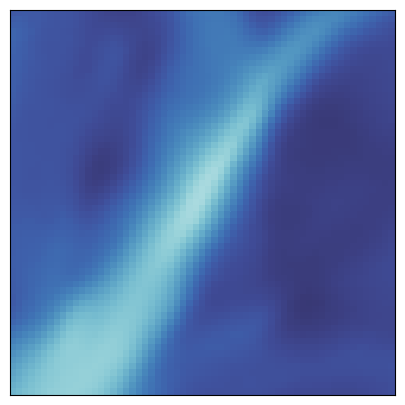

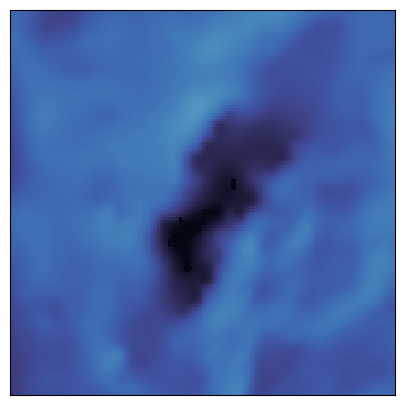

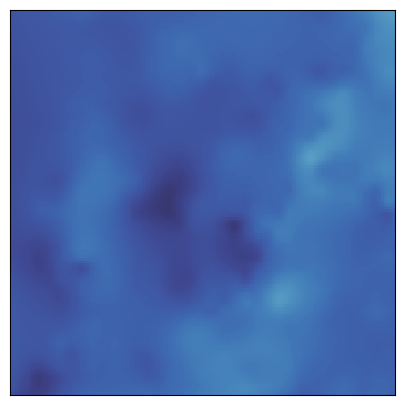

In [9]:
for region in ["region_lower_byrd", "region_mid_byrd", "region_upper_byrd"]:

    region_specs = corners_regions_byrd[corners_regions_byrd["name"] == region].iloc[0]

    bedmachine_region_subset = bedmachine.sel(
        x = slice(region_specs["x_min"], region_specs["x_max"]),
        y = slice(region_specs["y_max"], region_specs["y_min"])  # y goes from top to bottom (more positive to more negative)
    )

    # bedmap3_region_subset.ice_thickness.plot()

    # Extract 2D data and coordinates
    # NOTE: In Bedmachine it is just called "thickness"
    Z = bedmachine_region_subset.thickness.values
    X = bedmachine_region_subset.x.values
    Y = bedmachine_region_subset.y.values

    # Create 2D coordinate grids
    X2D, Y2D = np.meshgrid(X, Y)

    # Plot with pcolor
    plt.figure(figsize = (6, 5))
    # plt.pcolor(X2D, Y2D, Z, shading = 'auto', cmap = bedmap_cmap, vmin = 0, vmax = 3600)
    plt.pcolor(X2D, Y2D, Z, shading = 'auto', cmap = cmocean.cm.ice, vmin = 0, vmax = 3600)
    # plt.colorbar(label = "Ice thickness (m)")
    # plt.title(region["name"])

    # plt.xlabel("x [m]")
    # plt.ylabel("y [m]")

    plt.gca().set_aspect('equal')

    # Remove axis labels
    plt.xticks([])
    plt.yticks([])

    plt.savefig(f"/home/kim/ice_thickness/figures_real/bedmachine/{region}.png", dpi = 300, bbox_inches = 'tight', pad_inches = 0)

    plt.show()

In [67]:
bedmachine

<xarray.Dataset>
Dimensions:    (x: 13333, y: 13333)
Coordinates:
  * x          (x) int32 -3333000 -3332500 -3332000 ... 3332000 3332500 3333000
  * y          (y) int32 3333000 3332500 3332000 ... -3332000 -3332500 -3333000
Data variables:
    mapping    |S1 ...
    mask       (y, x) int8 ...
    firn       (y, x) float32 ...
    surface    (y, x) float32 ...
    thickness  (y, x) float32 ...
    bed        (y, x) float32 ...
    errbed     (y, x) float32 ...
    source     (y, x) int8 ...
    dataid     (y, x) int8 ...
    geoid      (y, x) int16 ...
Attributes: (12/17)
    Conventions:                 CF-1.7
    Title:                       BedMachine Antarctica
    Author:                      Mathieu Morlighem
    version:                     03-Jun-2022 (v3.4)
    nx:                          13333.0
    ny:                          13333.0
    ...                          ...
    ymax:                        3333000
    spacing:                     500
    no_data:                     -9999.0
    license:                     No restrictions on access or use
    Data_citation:               Morlighem M. et al., (2019), Deep glacial tr...
    Notes:                       Data processed at the Department of Earth Sy...